In [1]:
#import the libraries for data wrangling and visualizations
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
#read the csv file 
df = pd.read_csv('DE_clean.csv')
df.head(10)

,UTC time,coal,nat_gas,nuclear,oil,hydro,solar,wind,biomass,geothermal,unknown
0,2019-01-01 00:00:00,31135.0,13695.0,34141.0,0.0,6215.0,0.0,100935.0,22297.0,76.0,2171.0
1,2019-01-01 01:00:00,30278.0,12763.0,31816.0,0.0,6044.0,0.0,102694.0,22144.0,76.0,1915.0
2,2019-01-01 02:00:00,30510.0,12624.0,28887.0,0.0,5979.0,0.0,108760.0,22042.0,76.0,1900.0
3,2019-01-01 03:00:00,29949.0,12910.0,28480.0,0.0,5833.0,0.0,115908.0,22081.0,72.0,1892.0
4,2019-01-01 04:00:00,29551.0,12860.0,28243.0,0.0,5540.0,0.0,121113.0,22093.0,72.0,1892.0
5,2019-01-01 05:00:00,28924.0,12722.0,28141.0,0.0,5665.0,0.0,126208.0,22190.0,71.0,1888.0
6,2019-01-01 06:00:00,28882.0,12929.0,28692.0,0.0,5728.0,0.0,129437.0,22281.0,72.0,1888.0
7,2019-01-01 07:00:00,28745.0,13191.0,28622.0,0.0,5784.0,337.0,132544.0,22339.0,72.0,1888.0
8,2019-01-01 08:00:00,30282.0,13412.0,27960.0,0.0,5933.0,2331.0,131781.0,22370.0,72.0,1888.0
9,2019-01-01 09:00:00,30582.0,13383.0,26559.0,0.0,6142.0,5475.0,135589.0,22497.0,69.0,1888.0


In [3]:
#check if there are missing values and the dtypes 
print(df.isnull().sum())
print(df.dtypes)

#convert the UTC time to datetime 
df['UTC time'] = pd.to_datetime(df['UTC time'])

UTC time      0
coal          0
nat_gas       0
nuclear       0
oil           0
hydro         0
solar         0
wind          0
biomass       0
geothermal    0
unknown       0
dtype: int64
UTC time       object
coal          float64
nat_gas       float64
nuclear       float64
oil           float64
hydro         float64
solar         float64
wind          float64
biomass       float64
geothermal    float64
unknown       float64
dtype: object


In [4]:
#check if there are null values like 0.0 in the dataframe 
for col in df:
    if (df[col] == 0.0).any():
        print(f'The {col} contains 0s')
    else: 
        print(f'The values of {col} are valid')

The values of UTC time are valid
The values of coal are valid
The values of nat_gas are valid
The nuclear contains 0s
The oil contains 0s
The values of hydro are valid
The solar contains 0s
The values of wind are valid
The values of biomass are valid
The values of geothermal are valid
The values of unknown are valid


In [5]:
#print all the 0s values that exists in nuclear, oil, and solar 
columns_of_interest = ['oil', 'solar'] #'nuclear'

for col in columns_of_interest:
    zero_indices = df.index[df[col] == 0.0]
    for idx in zero_indices:
        start_idx = max(0, idx - 10)
        end_idx = min(len(df), idx + 11)
        values_around_zero = df.loc[start_idx:end_idx, col]
        #print(f"Values around 0 in '{col}' at index {idx}:")
        #print(values_around_zero)
        #print("-" * 40)

Based on this result, we can assume that nuclear, oil, and solar contains instances where data for that energy source is not collected.

For the nuclear source it's because Germany closed down on the remaining nuclear power plants. Source(https://www.base.bund.de/EN/ns/nuclear-phase-out/nuclear-phase-out_node.html#:~:text=On%2015%20April%202023%2C%20the,Neckarwestheim%202)

For the oil source, there are no news / hidden reason behind the missing data, so we will fill the missing data w/ the median as outliers exists in the data.

For the solar source it's because there's no solar energy in the morning (as sunrises) and at night, solar energy peaks at noon. Since this follows the trend of solar energy, we will leave it as it is.

In [6]:
#replace the 0 values
oil_median = df['oil'].median()
df['oil'] = df['oil'].mask(df['oil'] == 0.0,oil_median)
df['oil']


0        1531.0
1        1531.0
2        1531.0
3        1531.0
4        1531.0
          ...  
43891    1656.0
43892    1669.0
43893    1638.0
43894    1463.0
43895    1323.0
Name: oil, Length: 43896, dtype: float64

In [7]:
#obtain a basic data profile of the energy sources
df.describe()

,UTC time,coal,nat_gas,nuclear,oil,hydro,solar,wind,biomass,geothermal,unknown
count,43896,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000,43896.000000
mean,2021-07-03 11:30:00,64089.870102,22996.986359,21585.150784,1539.876553,6638.415317,22334.700933,58264.616604,20973.696425,88.979212,1773.888341
min,2019-01-01 00:00:00,14638.000000,4536.000000,0.000000,248.000000,3376.000000,0.000000,517.000000,15710.000000,20.000000,836.000000
25%,2020-04-02 05:45:00,42690.750000,14249.750000,14862.000000,1224.000000,5472.000000,0.000000,23565.750000,20058.000000,74.000000,1322.000000
50%,2021-07-03 11:30:00,63530.500000,21205.000000,25895.000000,1531.000000,6547.000000,689.500000,46724.500000,21098.000000,90.000000,1712.000000
75%,2022-10-03 17:15:00,84013.500000,30464.250000,31367.000000,1760.000000,7789.000000,35589.500000,84889.000000,21955.000000,104.000000,2207.000000
max,2024-01-03 23:00:00,132720.000000,66154.000000,58034.000000,4544.000000,10720.000000,162695.000000,258051.000000,40767.000000,232.000000,3630.000000
std,NaN,26325.718630,10858.434965,11737.130745,363.834906,1464.553577,34460.856260,42907.729903,1299.711520,20.317282,541.434518


In [36]:
#check if any outliers exists in the data 

def detect_outliers(df):
    for col in df:
        if col == 'UTC time':
            continue
        #switch to 90th percentile and 10th percentile
        Q1 = df[col].quantile(0.10)
        Q3 = df[col].quantile(0.90)
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR 

        #calculate the outliers by providing a lower and upper bound
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        

        #if there is an outlier, visualize it through a scatterplot
        if not outliers.empty:
            print(f"Column '{col}' contains outliers:")
            plt.style.use('tableau-colorblind10')
            plt.figure(figsize=(8, 6))
            plt.scatter(df.index, df[col], color='blue', label='Data')
            plt.scatter(outliers.index, outliers[col], color='red', label='Outliers')
            plt.title(f"Outliers in Column '{col}'")
            plt.xlabel('Index')
            plt.ylabel('Value')
            plt.legend()
            plt.show()
        else:
            print(f"Column '{col}' does not contain outliers.")

Column 'coal' does not contain outliers.
Column 'nat_gas' does not contain outliers.
Column 'nuclear' does not contain outliers.
Column 'oil' contains outliers:


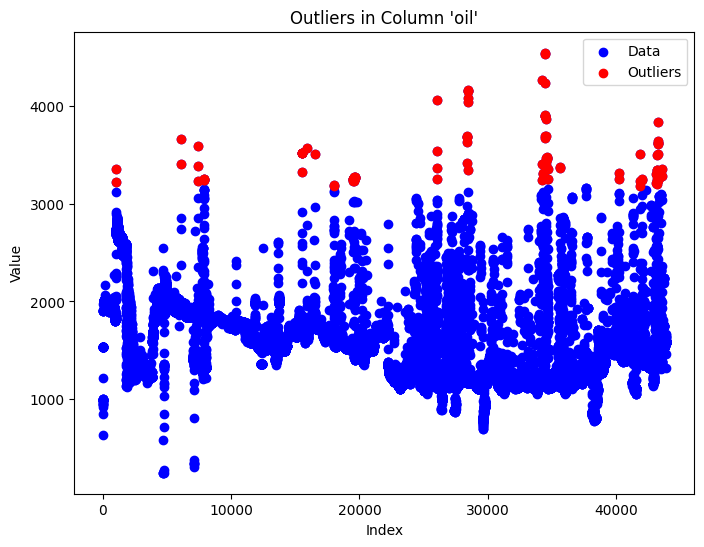

Column 'hydro' does not contain outliers.
Column 'solar' does not contain outliers.
Column 'wind' does not contain outliers.
Column 'biomass' contains outliers:


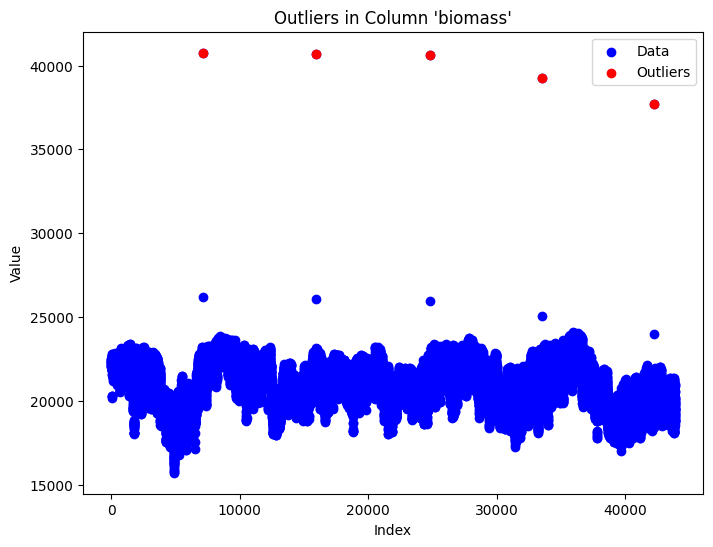

Column 'geothermal' contains outliers:


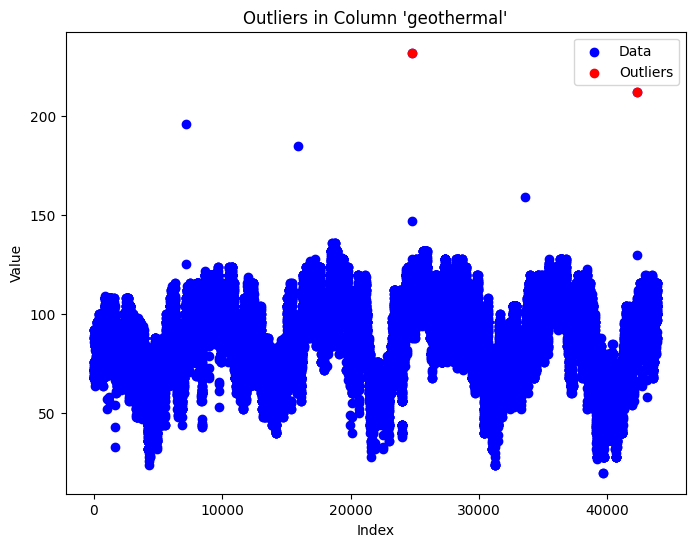

Column 'unknown' does not contain outliers.


In [44]:
detect_outliers(df)

Based on the IQR, we can determine that only oil, biomass, and geothermal sources containts outliers.

Outliers exists for oil, biomass, and geothermal, but we will ignore them for now because the ratios that we calculated later on show oil and geothermal as irrelevant (less than 1%). As for biomass the amount of outliers were minimal, so we will ignore it.

### Electricity Generation (General)

In [45]:
#create the calculate ratios function
def calculate_ratios(df):
    df = df.drop(columns=['UTC time'], errors='ignore')
    col_sum = df.sum()
    energy_sum = df.sum().sum()
    total_ratio = col_sum / energy_sum
    print(f'The ratio between each energy source and the total electricity production is: ')
    return total_ratio

#we note that the ratio for unknown, oil, and geothermal are less than 1%, so we will drop them. 
ratio = calculate_ratios(df)
ratio

The ratio between each energy source and the total electricity production is: 


coal          0.290939
nat_gas       0.104396
nuclear       0.097987
oil           0.006990
hydro         0.030135
solar         0.101389
wind          0.264495
biomass       0.095211
geothermal    0.000404
unknown       0.008053
dtype: float64

Since the ratios of oil, unknown, and geothermal are less than 1% we will dropped those sources. Additionally, we will also drop nuclear based on the source that DE closed all their nuclear plants, so there will be no nuclear sources in the future

In [46]:
#recreate the calculate ratios but this time also exclude oil, unknown, 
def calculate_ratios_excluded(df):
    df = df.drop(columns=['UTC time','oil','unknown','geothermal','nuclear'], errors='ignore')
    col_sum = df.sum()
    energy_sum = df.sum().sum()
    total_ratio = col_sum / energy_sum
    print(f'The ratio between each energy source and the total electricity production is: ')
    return total_ratio

new_ratio = calculate_ratios_excluded(df)
new_ratio

The ratio between each energy source and the total electricity production is: 


coal       0.328164
nat_gas    0.117753
hydro      0.033991
solar      0.114362
wind       0.298337
biomass    0.107393
dtype: float64

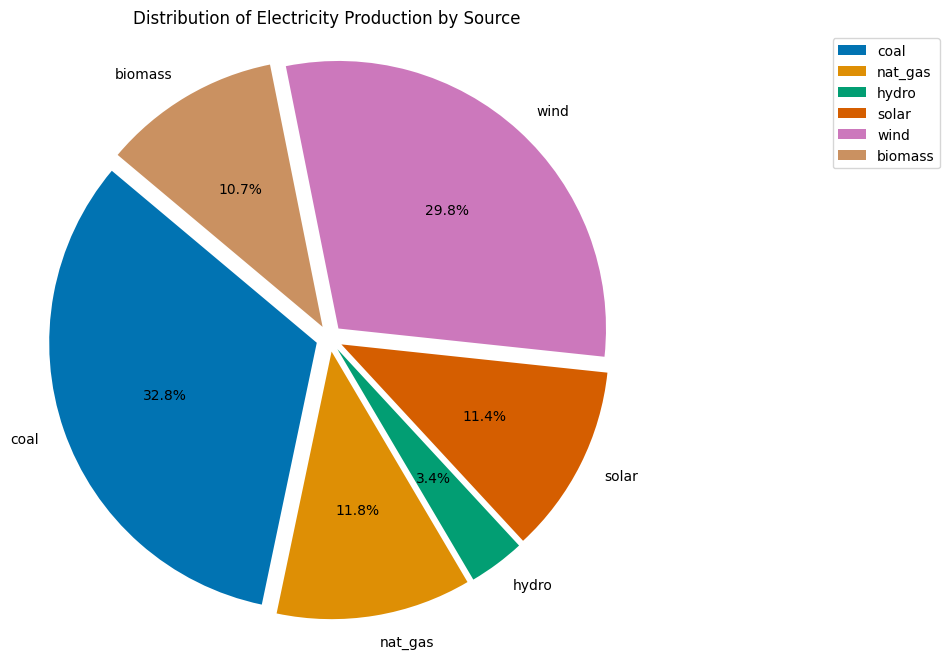

In [47]:
#create visualizations 
color = sns.color_palette('colorblind',10)
explodes = [0.05] * len(new_ratio)
plt.figure(figsize=(8, 8))
plt.pie(new_ratio, labels=new_ratio.index, autopct='%1.1f%%',colors=color, startangle=140,explode=explodes)
plt.title('Distribution of Electricity Production by Source')
plt.axis('equal') 
plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))
plt.show()

Based on the pie chart, we could see that coal is the top electricity production for DE, followed by wind and nat_gas, and we see that hydro contributed the least to electricity production after dropping the other columns.

The ratio between each energy source and the total electricity production for 2019 is: 
coal       0.347346
nat_gas    0.125793
hydro      0.036528
solar      0.096701
wind       0.286780
biomass    0.106852
dtype: float64
The ratio between each energy source and the total electricity production for 2020 is: 
coal       0.286067
nat_gas    0.137456
hydro      0.037996
solar      0.110841
wind       0.314504
biomass    0.113136
dtype: float64
The ratio between each energy source and the total electricity production for 2021 is: 
coal       0.353358
nat_gas    0.123414
hydro      0.033872
solar      0.109745
wind       0.270455
biomass    0.109155
dtype: float64
The ratio between each energy source and the total electricity production for 2022 is: 
coal       0.375143
nat_gas    0.086049
hydro      0.027912
solar      0.124962
wind       0.282481
biomass    0.103454
dtype: float64
The ratio between each energy source and the total electricity production for 2023 is: 
coal       0.277209


<Figure size 1000x600 with 0 Axes>

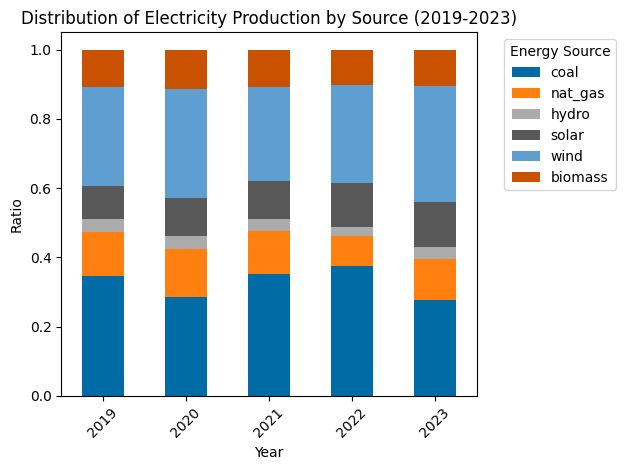

In [48]:
#calculate the ratio from 2019 to 2023 the changes using bar stacked chart 
def calculate_ratios_for_years(df,year):
    df_filtered = df[(df['UTC time'].dt.year == year)]
    df_filtered = df_filtered.drop(columns=['UTC time','oil','unknown','geothermal','nuclear'], errors='ignore')
    col_sum = df_filtered.sum()
    energy_sum = df_filtered.sum().sum()
    total_ratio = col_sum / energy_sum
    print(f'The ratio between each energy source and the total electricity production for {year} is: ')
    print(total_ratio)
    return total_ratio

#calculate the ratios for 2019-2023 and convert it into a df 
years = [2019, 2020, 2021, 2022, 2023]
ratios_per_year = [calculate_ratios_for_years(df, year) for year in years]
ratios_df = pd.DataFrame(ratios_per_year, index=years)

#plot the stacked bar chart 
plt.figure(figsize=(10, 6))
plt.style.use('tableau-colorblind10')
ratios_df.plot(kind='bar', stacked=True, cmap=None)
plt.title('Distribution of Electricity Production by Source (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Ratio')
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Electricity Generation (2019,2020,2021,2022,2023)

The ratio between each energy source and the total electricity production for 2019 is: 
coal       0.347346
nat_gas    0.125793
hydro      0.036528
solar      0.096701
wind       0.286780
biomass    0.106852
dtype: float64


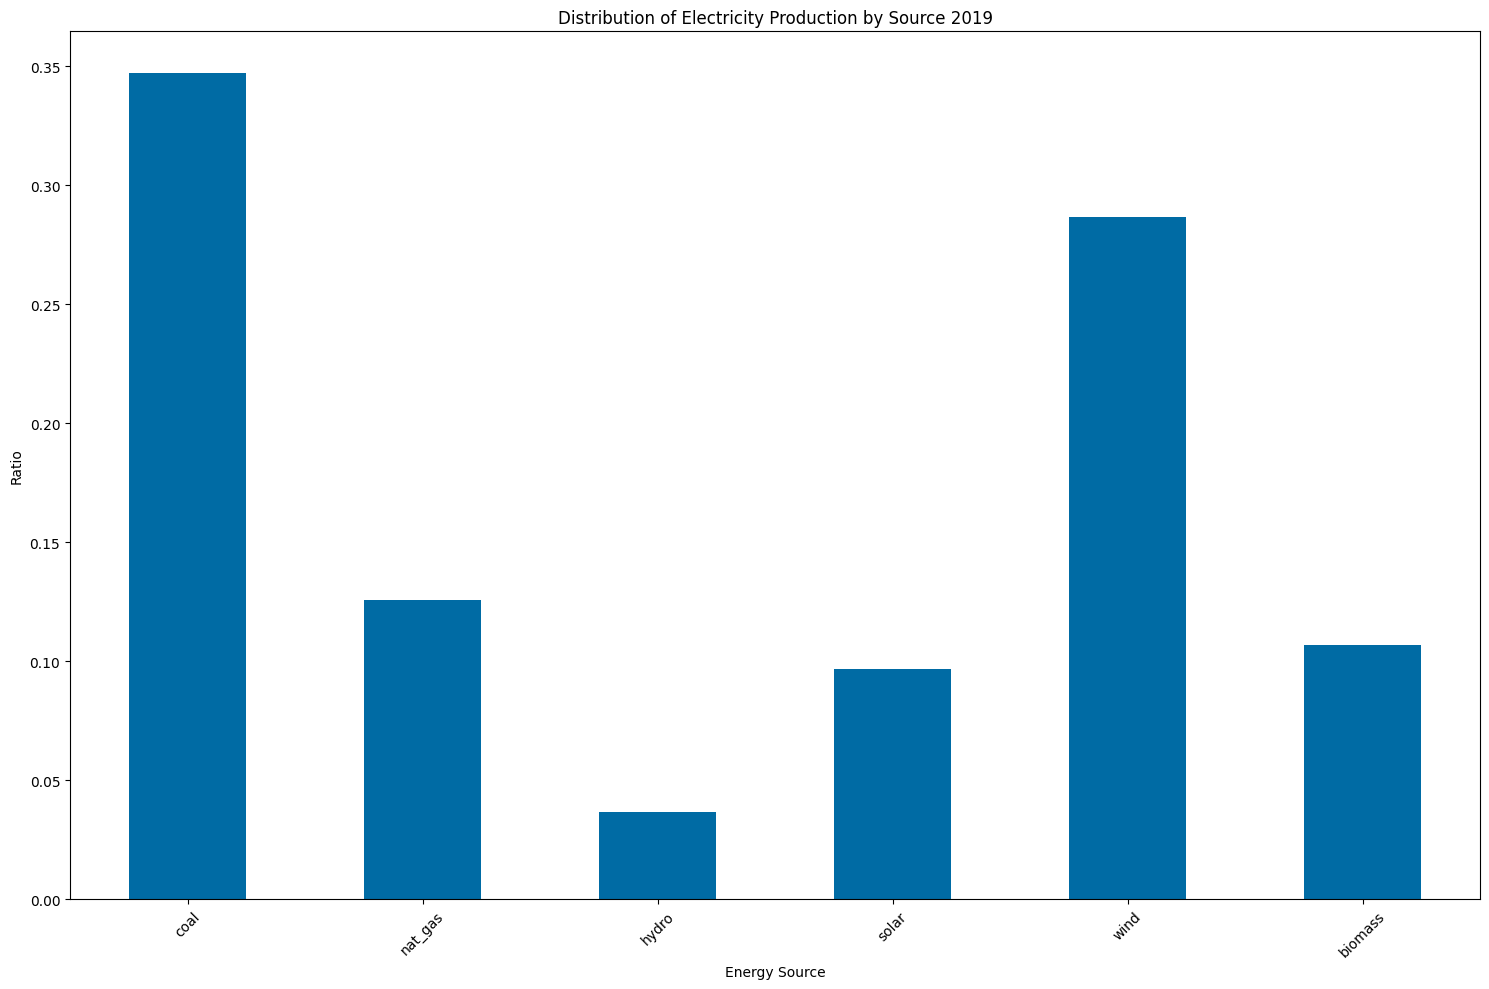

In [49]:
#plot the electricity generation for each year, 
plt.figure(figsize=(15, 10))
plt.style.use('tableau-colorblind10')
ratio_year = calculate_ratios_for_years(df, 2019) #replace the year with the one that you want to look at
ratio_year.plot(kind='bar', cmap=None)
plt.title(f'Distribution of Electricity Production by Source 2019') #also replace the year here 
plt.xlabel('Energy Source')
plt.ylabel('Ratio')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The ratio between each energy source and the total electricity production for 2019 is: 
coal       0.347346
nat_gas    0.125793
hydro      0.036528
solar      0.096701
wind       0.286780
biomass    0.106852
dtype: float64
The ratio between each energy source and the total electricity production for 2020 is: 
coal       0.286067
nat_gas    0.137456
hydro      0.037996
solar      0.110841
wind       0.314504
biomass    0.113136
dtype: float64
The ratio between each energy source and the total electricity production for 2021 is: 
coal       0.353358
nat_gas    0.123414
hydro      0.033872
solar      0.109745
wind       0.270455
biomass    0.109155
dtype: float64
The ratio between each energy source and the total electricity production for 2022 is: 
coal       0.375143
nat_gas    0.086049
hydro      0.027912
solar      0.124962
wind       0.282481
biomass    0.103454
dtype: float64
The ratio between each energy source and the total electricity production for 2023 is: 
coal       0.277209


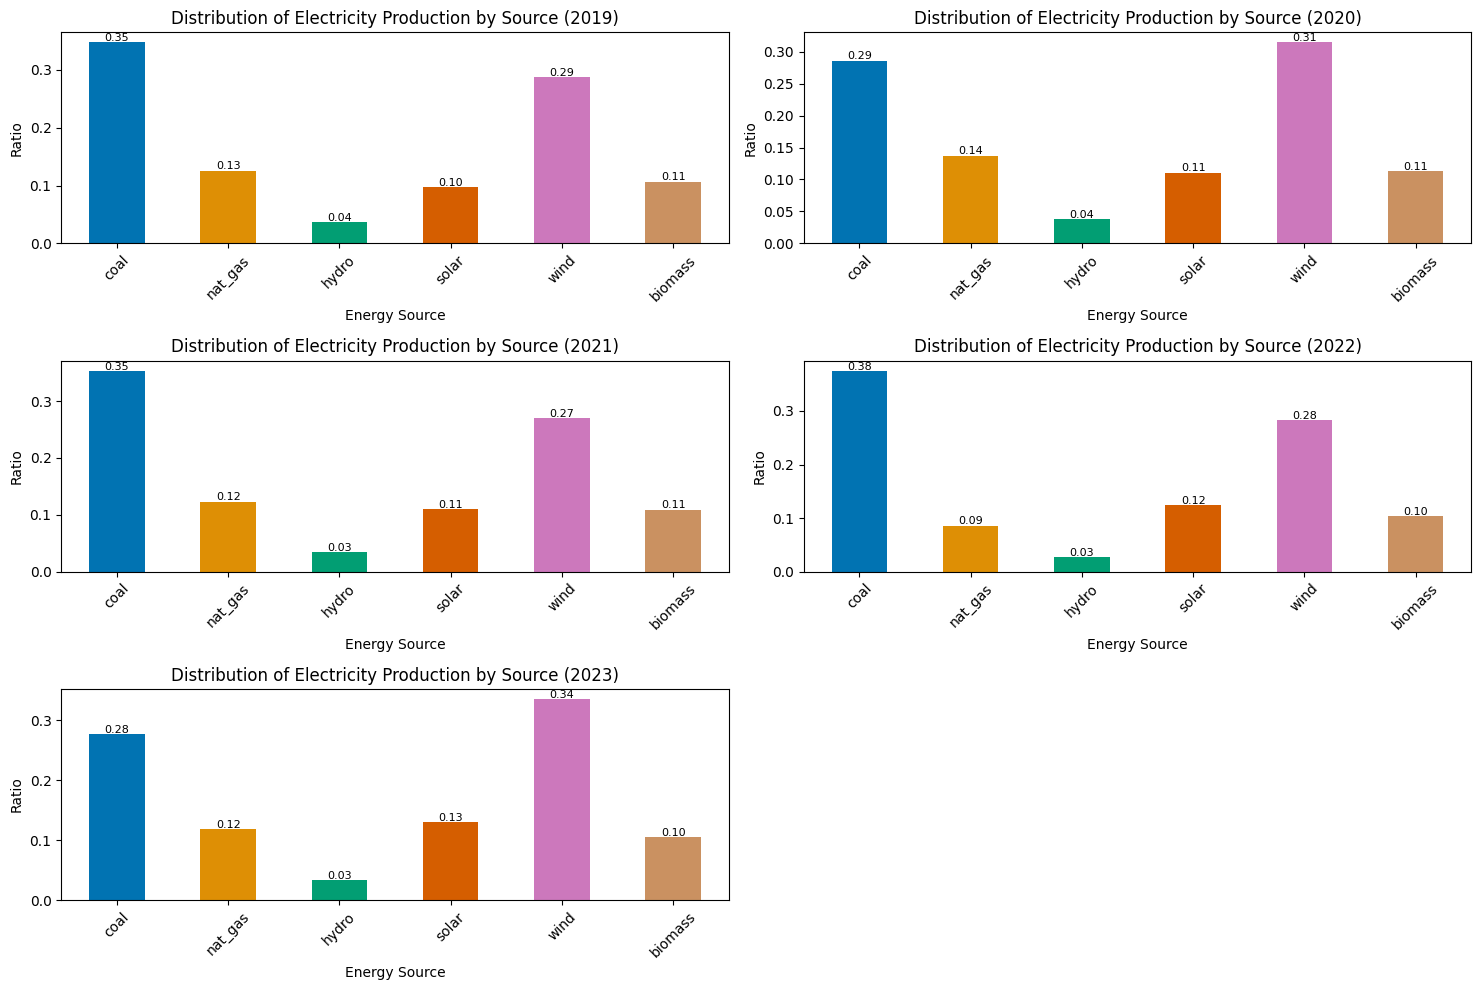

In [50]:
#plot the years side by side for better comparisons
years = [2019, 2020, 2021, 2022, 2023]

#iterate through the years and plot for each the ratios 
plt.figure(figsize=(15, 10))
for idx, year in enumerate(years):
    plt.subplot(3, 2, idx+1)

    #calculate the ratio and plot the ratio value above the bar plots
    ratio_year = calculate_ratios_for_years(df, year)
    ax = ratio_year.plot(kind='bar', color=sns.color_palette('colorblind', len(ratio_year)), legend=False)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 3), textcoords='offset points',fontsize=8)
    
    #account for the title, labels, and formats
    plt.title(f'Distribution of Electricity Production by Source ({year})')
    plt.xlabel('Energy Source')
    plt.ylabel('Ratio')
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

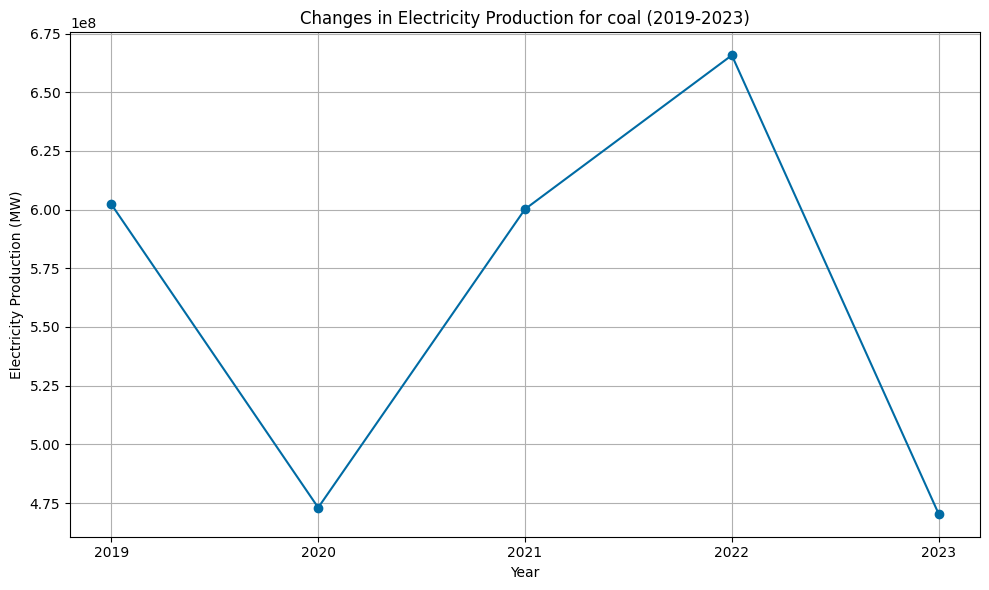

In [51]:
def plot_source_changes(df, source):
    yearly_sum = df[df['UTC time'].dt.year <= 2023].groupby(df['UTC time'].dt.year)[source].sum()

    #plot the graphs for the different sources
    plt.figure(figsize=(10, 6))
    plt.plot(yearly_sum.index, yearly_sum.values, marker='o', linestyle='-')
    plt.title(f'Changes in Electricity Production for {source} (2019-2023)')
    plt.xlabel('Year')
    plt.ylabel('Electricity Production (MW)')
    plt.grid(True)
    plt.xticks(yearly_sum.index)
    plt.tight_layout()
    plt.show()

plot_source_changes(df, 'coal') #adjust the source to see 'coal','nat_gas','hydro','solar','wind','biomass'